# Muni Shaming: Machine Learning Component

The code here cleans the muni data, and performs machine learning on the data

 ### Data Preprocessing - json

In [196]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [165]:
# convert the jason file to a python dictionary

muni_file = "MUNI-Stop-prediction.json"
with open(muni_file,"r") as f:
    muni_json = json.load(f)

In [166]:
# capture metadata

ResponseTimestamp = muni_json["ServiceDelivery"]["ResponseTimestamp"]
ProducerRef = muni_json["ServiceDelivery"]["ProducerRef"]
Status = muni_json["ServiceDelivery"]["Status"]
version = muni_json["ServiceDelivery"]["StopMonitoringDelivery"]["version"]

In [167]:
# create a dataframe from a dictionary from within the python dictionary, using a normalize function

from pandas.io.json import json_normalize

MonitoredStopVisit_json = muni_json["ServiceDelivery"]["StopMonitoringDelivery"]["MonitoredStopVisit"]
muni_df = pd.DataFrame.from_dict(json_normalize(MonitoredStopVisit_json), orient='columns')

muni_df.head()

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,MonitoredVehicleJourney.Occupancy,MonitoredVehicleJourney.OperatorRef,MonitoredVehicleJourney.OriginName,MonitoredVehicleJourney.OriginRef,MonitoredVehicleJourney.PublishedLineName,MonitoredVehicleJourney.VehicleLocation.Latitude,MonitoredVehicleJourney.VehicleLocation.Longitude,MonitoredVehicleJourney.VehicleRef,MonitoringRef,RecordedAtTime
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,None,SF,Bowley St & Lincoln Blvd,13706,SUNSET,37.7630653,-122.496071,8833,16531,2019-07-18T22:22:33Z
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,None,SF,Sacramento St & Cherry St,16293,ASHBURY-18TH ST,37.7611389,-122.430641,8157,13323,2019-07-18T22:22:33Z
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,None,SF,Marina Blvd & Laguna St,14729,MASONIC,37.769268,-122.450745,8960,14092,2019-07-18T22:22:33Z
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,None,SF,Marina Blvd & Laguna St,14729,MASONIC,37.7985458,-122.446899,8966,15293,2019-07-18T22:22:33Z
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,None,SF,Geary Blvd & 33rd Ave,14277,CALIFORNIA,37.7798538,-122.493126,5791,13555,2019-07-18T22:22:33Z


In [168]:
# append the metadata to the dataframe
muni_df["ResponseTimestamp"] = ResponseTimestamp
muni_df["ProducerRef"] = ProducerRef
muni_df["Status"] = Status
muni_df["version"] = version

In [169]:
muni_df

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,MonitoredVehicleJourney.PublishedLineName,MonitoredVehicleJourney.VehicleLocation.Latitude,MonitoredVehicleJourney.VehicleLocation.Longitude,MonitoredVehicleJourney.VehicleRef,MonitoringRef,RecordedAtTime,ResponseTimestamp,ProducerRef,Status,version
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,SUNSET,37.7630653,-122.496071,8833,16531,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,ASHBURY-18TH ST,37.7611389,-122.430641,8157,13323,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,MASONIC,37.769268,-122.450745,8960,14092,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,MASONIC,37.7985458,-122.446899,8966,15293,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,CALIFORNIA,37.7798538,-122.493126,5791,13555,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
5,None,Ferry Plaza,16497,Inbound,2019-07-18,8765671,None,21,True,2019-07-18T22:20:00Z,...,HAYES,37.778595,-122.414963,5755,15650,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
6,None,Daly City BART,17925,Outbound,2019-07-18,8843178,None,28,True,2019-07-18T22:19:16Z,...,19TH AVENUE,37.8011017,-122.426758,8921,15280,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
7,None,Temporary Transbay Terminal,17916,Inbound,2019-07-18,8782862,None,38,True,2019-07-18T22:24:08Z,...,GEARY,37.7807846,-122.467186,6593,14258,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
8,None,Great Highway,14781,Outbound,2019-07-18,8793726,None,48,True,2019-07-18T22:21:17Z,...,QUINTARA-24TH STREET,37.7512207,-122.435631,8661,13468,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
9,None,City College,15926,Outbound,2019-07-18,8794933,None,49,True,2019-07-18T22:22:00Z,...,VAN NESS-MISSION,37.8048096,-122.425369,6615,16801,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4


In [170]:
import datetime

In [171]:
if 'Scheduled Arrival Time' in muni_df.columns:
    muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

if 'Actual Arrival Time' in muni_df.columns:
    muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["MonitoredVehicleJourney.MonitoredCall.ExpectedArrivalTime"])

In [172]:
if 'time late' in muni_df.columns:
    muni_df.drop(["time late"], axis = 1)

if 'time early' in muni_df.columns:
    muni_df.drop(["time early"], axis = 1)

In [173]:
muni_df["time early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]

In [174]:
muni_df["minutes early/(late)"] = muni_df["time early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time early"]/np.timedelta64(1,"m")

In [175]:
muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time"] = muni_df["hour"] + muni_df["minute"]/60

In [188]:
muni_df.head()

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,Scheduled Arrival Time,Actual Arrival Time,time early,time late,minutes early/(late),minutes_early,weekday,hour,minute,time
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,2019-07-18 22:18:10+00:00,2019-07-18 22:22:45+00:00,-1 days +23:55:25,00:04:35,-4.583333,-4.583333,3,22,18,22.300000
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,2019-07-18 22:25:38+00:00,2019-07-18 22:22:45+00:00,00:02:53,-1 days +23:57:07,2.883333,2.883333,3,22,25,22.416667
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,2019-07-18 22:28:27+00:00,2019-07-18 22:22:45+00:00,00:05:42,-1 days +23:54:18,5.700000,5.700000,3,22,28,22.466667
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,2019-07-18 22:24:00+00:00,2019-07-18 22:22:45+00:00,00:01:15,-1 days +23:58:45,1.250000,1.250000,3,22,24,22.400000
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,2019-07-18 22:22:48+00:00,2019-07-18 22:22:46+00:00,00:00:02,-1 days +23:59:58,0.033333,0.033333,3,22,22,22.366667


In [181]:
# Get list of lines for user
line = set(df_1["MonitoredVehicleJourney.LineRef"].values)
print(line)

{'39', '33', '31BX', '2', 'N', '5R', '10', '18', '8', 'PH', '14', '31', '14R', '9R', '8BX', '12', '28', '57', '23', '21', '28R', '22', '38R', 'M', 'C', '1', '41', '45', 'NX', '25', '30X', 'L', '7', '48', '19', '3', '47', '52', 'F', '9', '55', 'PM', '36', '14X', '29', '38AX', 'J', '30', '35', '43', '66', '49', '67', '27', 'S', '7X', '38BX', '6', '38', '5', '1BX', '44', '56', '54', '31AX', '37', 'E', '24', 'KT', '1AX', '8AX'}


In [182]:
# user selects line
selected_line = 'N'

In [183]:
# filter data for selected line
df_2 = pd.DataFrame(columns = muni_df.columns).append(df_1[df_1['MonitoredVehicleJourney.LineRef'] == selected_line])



In [184]:
# Get list of stops for user
avail_stop = set(df_2["MonitoredVehicleJourney.MonitoredCall.StopPointRef"].values)
avail_stop

{'15199', '15201', '15202', '15214', '16992', '17252'}

In [185]:
# user selects stop
selected_stop = '15199'

In [186]:
# filter data for selected stop
df_3 = pd.DataFrame(columns = muni_df.columns).append(df_2[df_2['MonitoredVehicleJourney.MonitoredCall.StopPointRef'] == selected_stop])


In [187]:
# Grab filtered data
selected_muni_df = df_1 #--> using all data for now!

selected_muni_df.head()

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,Scheduled Arrival Time,Actual Arrival Time,time early,time late,minutes early/(late),minutes_early,weekday,hour,minute,time
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,2019-07-18 22:18:10+00:00,2019-07-18 22:22:45+00:00,-1 days +23:55:25,00:04:35,-4.583333,-4.583333,3,22,18,22.300000
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,2019-07-18 22:25:38+00:00,2019-07-18 22:22:45+00:00,00:02:53,-1 days +23:57:07,2.883333,2.883333,3,22,25,22.416667
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,2019-07-18 22:28:27+00:00,2019-07-18 22:22:45+00:00,00:05:42,-1 days +23:54:18,5.700000,5.700000,3,22,28,22.466667
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,2019-07-18 22:24:00+00:00,2019-07-18 22:22:45+00:00,00:01:15,-1 days +23:58:45,1.250000,1.250000,3,22,24,22.400000
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,2019-07-18 22:22:48+00:00,2019-07-18 22:22:46+00:00,00:00:02,-1 days +23:59:58,0.033333,0.033333,3,22,22,22.366667


In [189]:
# Assign the data to X and y

X = selected_muni_df.time.values.reshape(-1, 1)
y = selected_muni_df.minutes_early.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (384, 1) (384, 1)


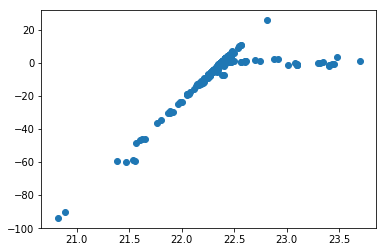

In [192]:
plt.scatter(X, y)

 ### Data Preprocessing - csv


In [223]:
muni_df = pd.read_csv('prediction_samples/muni_prediction_sample.csv')
muni_df.head()

,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time
0,1705,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,14265,2019-07-24 01:33:55.000000,2019-07-24 01:44:02.000000
1,1706,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,7,Inbound,15311,2019-07-24 01:41:05.000000,2019-07-24 01:44:04.000000
2,1707,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Inbound,16125,2019-07-24 01:41:17.000000,2019-07-24 01:44:05.000000
3,1708,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,17854,2019-07-24 01:46:17.000000,2019-07-24 01:44:06.000000
4,1709,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,N,Outbound,15205,2019-07-24 01:37:33.000000,2019-07-24 01:44:06.000000


In [199]:
if 'Scheduled Arrival Time' in muni_df.columns:
    muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

if 'Actual Arrival Time' in muni_df.columns:
    muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["scheduled_arrival_time"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["expected_arrival_time"])


if 'time_late' in muni_df.columns:
    muni_df.drop(["time late"], axis = 1)

if 'time_early' in muni_df.columns:
    muni_df.drop(["time early"], axis = 1)
    
    
muni_df["time_early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time_late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]

muni_df["minutes early/(late)"] = muni_df["time_early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time_early"]/np.timedelta64(1,"m")

muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time"] = muni_df["hour"] + muni_df["minute"]/60

In [202]:
muni_df

,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time,Scheduled Arrival Time,Actual Arrival Time,time_early,time_late,minutes early/(late),minutes_early,weekday,hour,minute,time
0,1705,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,14265,2019-07-24 01:33:55.000000,2019-07-24 01:44:02.000000,2019-07-24 01:33:55,2019-07-24 01:44:02,-1 days +23:49:53,00:10:07,-10.116667,-10.116667,2,1,33,1.550000
1,1706,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,7,Inbound,15311,2019-07-24 01:41:05.000000,2019-07-24 01:44:04.000000,2019-07-24 01:41:05,2019-07-24 01:44:04,-1 days +23:57:01,00:02:59,-2.983333,-2.983333,2,1,41,1.683333
2,1707,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Inbound,16125,2019-07-24 01:41:17.000000,2019-07-24 01:44:05.000000,2019-07-24 01:41:17,2019-07-24 01:44:05,-1 days +23:57:12,00:02:48,-2.800000,-2.800000,2,1,41,1.683333
3,1708,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,17854,2019-07-24 01:46:17.000000,2019-07-24 01:44:06.000000,2019-07-24 01:46:17,2019-07-24 01:44:06,00:02:11,-1 days +23:57:49,2.183333,2.183333,2,1,46,1.766667
4,1709,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,N,Outbound,15205,2019-07-24 01:37:33.000000,2019-07-24 01:44:06.000000,2019-07-24 01:37:33,2019-07-24 01:44:06,-1 days +23:53:27,00:06:33,-6.550000,-6.550000,2,1,37,1.616667
5,1710,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,14,Inbound,15583,2019-07-24 01:41:18.000000,2019-07-24 01:44:07.000000,2019-07-24 01:41:18,2019-07-24 01:44:07,-1 days +23:57:11,00:02:49,-2.816667,-2.816667,2,1,41,1.683333
6,1711,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Outbound,13644,2019-07-24 01:46:05.000000,2019-07-24 01:44:07.000000,2019-07-24 01:46:05,2019-07-24 01:44:07,00:01:58,-1 days +23:58:02,1.966667,1.966667,2,1,46,1.766667
7,1712,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Inbound,15814,2019-07-24 01:45:39.000000,2019-07-24 01:44:07.000000,2019-07-24 01:45:39,2019-07-24 01:44:07,00:01:32,-1 days +23:58:28,1.533333,1.533333,2,1,45,1.750000
8,1713,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Outbound,16609,2019-07-24 01:39:41.000000,2019-07-24 01:44:08.000000,2019-07-24 01:39:41,2019-07-24 01:44:08,-1 days +23:55:33,00:04:27,-4.450000,-4.450000,2,1,39,1.650000
9,1714,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,N,Inbound,15214,2019-07-24 01:38:56.000000,2019-07-24 01:44:08.000000,2019-07-24 01:38:56,2019-07-24 01:44:08,-1 days +23:54:48,00:05:12,-5.200000,-5.200000,2,1,38,1.633333


In [216]:
#FILTER 1 - WEEKDAY

# Get list of weekdays for user
weekday = set(muni_df["weekday"].values)
print(weekday)

# user selects line
selected_weekday = 2

# filter data for selected line
df_1 = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['weekday'] == selected_weekday])


{2}


In [217]:
#FILTER 2 - MUNI LINE

# Get list of lines for user
lines = set(df_1["line_ref"].values)
print(lines)

# user selects line
selected_line = 'N'

# filter data for selected line
df_2 = pd.DataFrame(columns = muni_df.columns).append(df_1[df_1['line_ref'] == selected_line])

{'2', '38', 'M', 'N', '14', '7'}


In [218]:
#FILTER 3 - INBOUND / OUTBOUND

# Get list of lines for user
in_out = set(df_2["direction_ref"].values)
print(in_out)

# user selects line
selected_direction = 'Outbound'

# filter data for selected line
df_3 = pd.DataFrame(columns = muni_df.columns).append(df_2[df_2['direction_ref'] == selected_direction])

{'Inbound', 'Outbound'}


In [219]:
#FILTER 4 - MUNI STOP

stops = set(df_3["stop_point_ref"].values)
print(stops)

# user selects line
selected_stop = 17217

# filter data for selected line
df_4 = pd.DataFrame(columns = muni_df.columns).append(df_3[df_3['stop_point_ref'] == selected_stop])

{17217, 15202, 17219, 16996, 16997, 15205, 15237, 15209, 15211, 15213, 15118, 15121, 15224, 13912, 15193, 13914, 15198, 15199}


In [220]:
# Grab filtered data
selected_muni_df = df_4 #--> using all data for now!

selected_muni_df

,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time,Scheduled Arrival Time,Actual Arrival Time,time_early,time_late,minutes early/(late),minutes_early,weekday,hour,minute,time
204,1909,2019-07-24 02:40:01.000000,2019-07-24 02:39:54.000000,N,Outbound,17217,2019-07-24 02:39:00.000000,2019-07-24 02:40:50.000000,2019-07-24 02:39:00,2019-07-24 02:40:50,-1 days +23:58:10,00:01:50,-1.833333,-1.833333,2,2,39,2.65


In [214]:
# Assign the data to X and y

X = selected_muni_df.time.values.reshape(-1, 1)
y = selected_muni_df.minutes_early.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (252, 1) (252, 1)


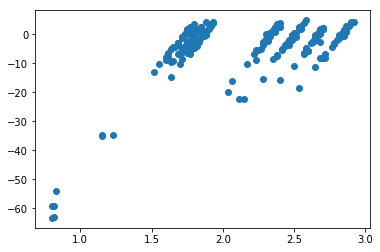

In [215]:
plt.scatter(X, y)

 ### Creating our Model
 For numerical data, we are selecting the regressor model

### Defining our Model Architecture (the layers)

### Model Summary

### Compile the Model

### Training the Model

### Quantify the Data

### Making predictions with New Data